In [57]:
# Project by vedang savadi
# I have made a model that predicts the emission of co2 using simple linear regression. 

In [58]:
import matplotlib.pyplot as plt
import pandas as pd 
import pylab as pl 
import numpy as np 

In [59]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [60]:
# Data Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [61]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


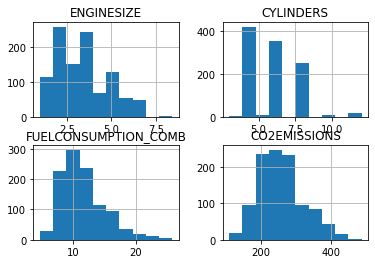

In [62]:
# creating the histogram of each attribute 
cdf.hist() #creates the histogram
plt.show()


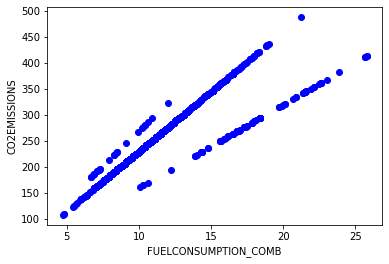

In [63]:
#plotting FUELCONSUMPTION_COMB against CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

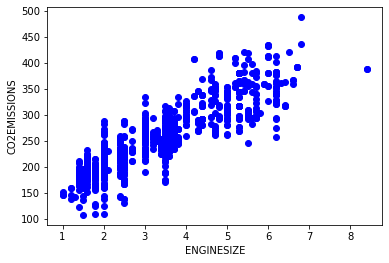

In [64]:
#plotting ENGINESIZE against CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

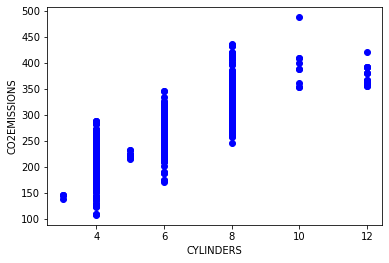

In [65]:
#plotting CYLINDERS against CO2EMISSIONS
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [66]:
#creating train and test dataset 
#80% data is used for training and 20% for testing
# we create a mask msk to select random rows from the data frame
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

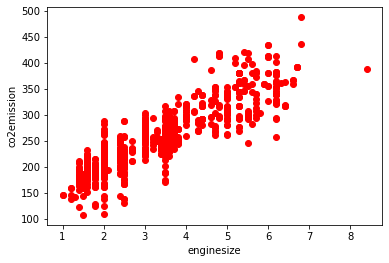

In [67]:
#simple regression model
# 1. Train data distribution 
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'red')
plt.xlabel('enginesize')
plt.ylabel('co2emission')
plt.show()

In [68]:
# MODELING
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']]) #input
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #output
regr.fit(train_x , train_y)
# The coefficients
# y = mx + c
m=regr.coef_
c=regr.intercept_
print('m : ', regr.coef_)
print('c : ', regr.intercept_)

m :  [[38.94552562]]
c :  [126.32806219]


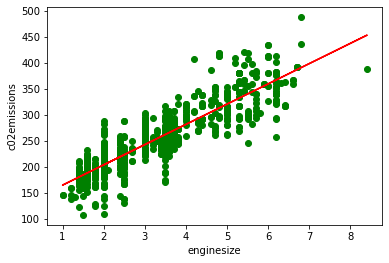

In [69]:
#PLOT OUTPUTS
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'green')
plt.plot(train_x, m*train_x + c , c='r') # this is the best fit line 
plt.xlabel('enginesize')
plt.ylabel('c02emissions')
plt.show()

In [70]:
#Evaluation
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = regr.predict(test_x)

print("mean absolute error : %.2f" % np.mean(np.absolute(predict - test_y)))
print("residual sum of squares (MSE): %.2f"% np.mean((predict - test_y)**2))
print(" R2-score: %.2f"% r2_score(test_y , predict)) # r2 score of 1 means 100% accuracy.

mean absolute error : 25.98
residual sum of squares (MSE): 1099.25
 R2-score: 0.72
